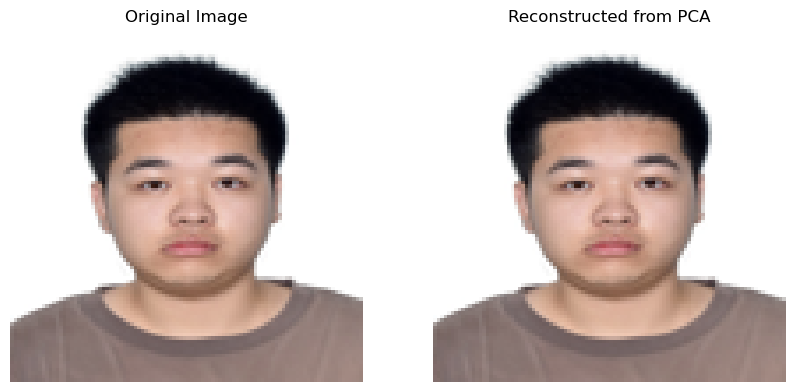

原始图片形状: (100, 100, 3)
降维后特征数: 9
重建MSE误差: 0.0051


In [39]:
# 1. 导入库
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2. 加载单张图片
def load_single_image(file_path, target_size=(100, 100)):
    """加载并预处理单张图片"""
    img = Image.open(file_path).convert('RGB')  # 确保为RGB格式
    img = img.resize(target_size)  # 调整尺寸以控制计算量
    img_array = np.array(img)
    return img_array

# 3. 主流程
# ----------------------------------------------------------
# 设置参数
image_path = "./data_additional/CHEN Yanzhi.jpg"  # 替换为实际图片路径
target_size = (100, 100)       # 控制图片分辨率

# 加载图片
original_img = load_single_image(image_path, target_size)

# 展平数据（注意：单张图片需包装成二维数组）
img_flattened = original_img.reshape(1, -1).astype(np.float32) / 255.0

# 4. 特殊处理：PCA需要多样本数据（解决方法：复制生成虚拟数据集）
n_virtual_samples = 10  # 虚拟样本数量（仅用于演示）
virtual_data = np.repeat(img_flattened, n_virtual_samples, axis=0)

# 执行PCA（训练+转换）
pca = PCA(n_components = 9)
pca.fit(virtual_data)  # 在虚拟数据上训练
img_pca = pca.transform(img_flattened)  # 转换原始图片

# 5. 重建图片
reconstructed = pca.inverse_transform(img_pca)
reconstructed_img = (reconstructed.reshape(original_img.shape) * 255).clip(0, 255).astype(np.uint8)

# 6. 可视化对比
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title("Reconstructed from PCA")
plt.axis('off')

plt.show()

# 输出关键信息
print("原始图片形状:", original_img.shape)
print("降维后特征数:", img_pca.shape[1])
print("重建MSE误差:", np.mean((original_img - reconstructed_img)**2))

In [40]:
def load_single_image(file_path, target_size=(100, 100)):
    """加载并预处理单张图片"""
    img = Image.open(file_path).convert('RGB')  # 确保为RGB格式
    img = img.resize(target_size)  # 调整尺寸以控制计算量
    img_array = np.array(img)
    return img_array

In [41]:
image_path = "your_image.jpg"  # 替换为实际图片路径
target_size = (100, 100)       # 控制图片分辨率

# 加载图片
original_img = load_single_image(image_path, target_size)

# 展平数据（注意：单张图片需包装成二维数组）
img_flattened = original_img.reshape(1, -1).astype(np.float32) / 255.0

# 4. 特殊处理：PCA需要多样本数据（解决方法：复制生成虚拟数据集）
n_virtual_samples = 10  # 虚拟样本数量（仅用于演示）
virtual_data = np.repeat(img_flattened, n_virtual_samples, axis=0)

# 执行PCA（训练+转换）
pca = PCA(n_components=50)
pca.fit(virtual_data)  # 在虚拟数据上训练
img_pca = pca.transform(img_flattened)  # 转换原始图片

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\2024-2025\\Lower Half\\Computer Vision\\Homework1\\part2\\your_image.jpg'

原始数据形状: (1, 64, 64, 3)


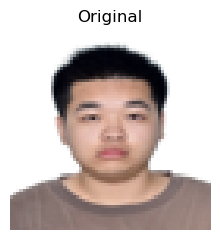

降维后形状: (1, 1)


c:\Users\Change\anaconda3\Lib\site-packages\sklearn\decomposition\_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


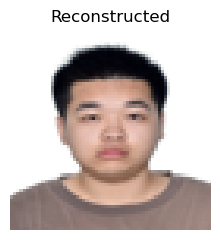

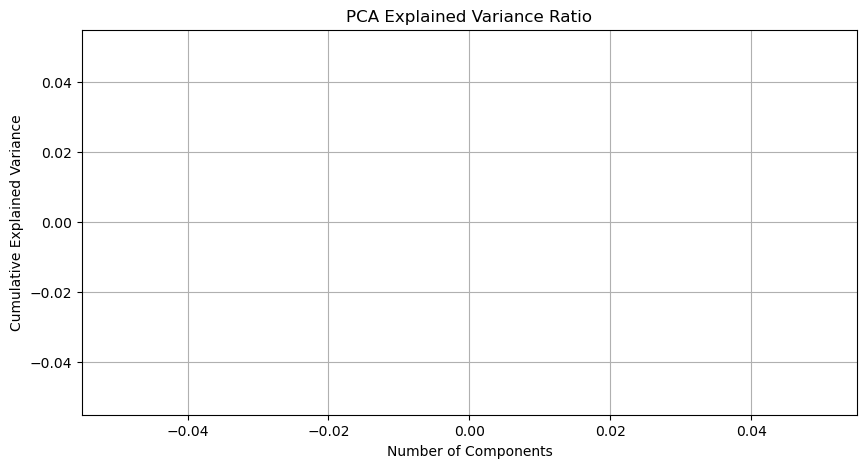

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()